# P-values vs. T-values 

If you've run a t-test before, you might have wondered what about the difference between p-values and t-values. The vague names of the statistics don't tell us much about what they represent or where they come from. Those from a science field might have heard of the importnace of $p<0.5$ interpreting your results. Are t -values even important, then? Are they related? The answer to both is yes. 

P-values and t-values are inextricably linked, but very distinguishable. When you run a simple t-test you're usually trying to find evidence of a significant difference between two datasets. For example, suppose, that you want to test the hypothesis that the average height of males at your workplace is taller than the average height of people from your hometown. You collect heights of 200 employees and 200 residents, selected at random, and calculate that the sample mean is 5ft. 10 inches vs 6ft. But that difference is not statistically significant on its own; it could easily just be random chance that a couple people you randomly sampled from work make it seem like city-folk are short. You need statistical rigor to figure out much of the data your model explains. This is what t and p-values both measure. 

Let's build a python model to explain this. 

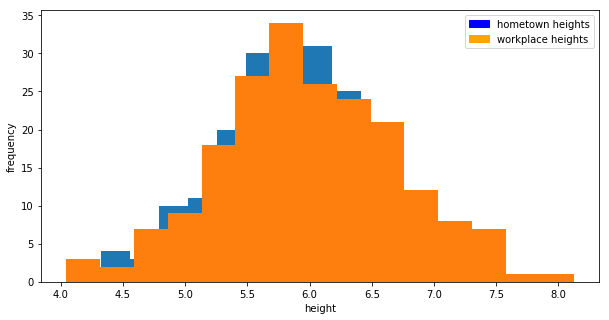

In [1]:
import numpy as np  
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#two populations: 
np.random.seed(1) #ensure we get the same results every time 
y1 = np.random.normal(5.8, .7, 200) #normally distributed data centered on 5.8ft, variance of .7ft, 200 samples
y2 = np.random.normal(6.0, .7, 200) #normally distributed data centered on 6ft, variance of .7ft, 200 samples

#plot histograms of data 
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(y1, bins=15)
ax1.hist(y2, bins=15)

plt.ylabel('frequency');
plt.xlabel('height');
b_patch = mpatches.Patch(color='blue', label='hometown heights');
r_patch = mpatches.Patch(color='orange', label='workplace heights');
plt.legend(handles=[b_patch, r_patch])
plt.show()

In [2]:
#run t-test, compute p and t values 
t_val, p_val = ttest_ind(y1, y2)
print 't_test results:'
print 't-value', t_val
print 'p-value', p_val

t_test results:
t-value -1.77830037658
p-value 0.0761178586726


Above we run scipy's t-test to compare our two populations of heights. We are looking for a t-value and p-value that indicate that our populations are significantly different. 

The t-value measures the size of the difference between the two populations relative to the variation in the data. Put another way, T is the calculated difference represented in units of standard error. 

$$ t=\frac{\bar{x}-\mu_0} {SE_\bar{x}} =\frac{difference_{populations}}{variation} $$

Where $\bar{x}$ is the sample mean, $\mu$ is the population mean and $SE_\bar{x}$ is the standard error.

The greater the magnitude of T (either positive or negative), the greater the evidence against the null hypothesis that there is no significant difference in the heights of city and townfolks. The closer T is to 0, the more likely there isn't a significant difference. As you can see, the magnitude of the difference and/or the magnitude of the error will ultimately drive these changes. The t-statistic alone is difficult to interpret, because it extends to $+/- \infty$. Scaling this value will address this issue. 

We can use a t-distribution to solve this. You might generate a chart like this, which represents the frequency distribution of the spectrum of t-values. 

<img src='../files/t_dist.png' width='350'>

The shaded region represents the probability of obtaining a t-value of 1.77 or greater. Imagine a magical dart that could be thrown to land randomly anywhere under the distribution curve. What's the chance it would land in the shaded region, after our t-value? The calculated probability is  0.076. This is our p-value! 

Recall that a probability can only be between 0-1, so our t-value has effectively been scaled. A p-value near 0, say 0.05, means that only 5% of the difference in our datasets can be attributed to random chance. The other 95% is because of some feature in our data.The smaller the magnitude of $p$, the greater the evidence against the null hypothesis that there is no significant difference in the heights of city and townfolks. Typically we use this cutoff of $p < 0.05$ for significance. In practice you can derive the p-value from the t-value by looking it up a t-table, but python will calculate it automatically. 

## To recap: 

The t-value and p-value are inextricably linked, and inversely related. The t-value extends from to $+/- \infty$, while the p-value is a probability bound from 0-1. As the absolute value of the t-value  grows, the p-value shrinks, and the greater the evidence against the null hypothesis. A cutoff of $p < 0.05$ is used to declare statistical significance. If this is the case, it does not necessarily mean that your hypothesis is true. It just means that the null hypothesis is not true; that the idea that there is no difference in your datasets is not true. 

Though this is not very straightforward, it ultimately guides the scientific process - which consists of creating a hypothesis and running tests to disprove it. If you cannot disprove your hypothesis, you may have found a truth. Statisitcs, science, and findings truths is difficult, and it is in this rigor that the scientific process should be admired. 

-----------------------------------------------------------------------------------------

## Further Reading  

*[Another great explanation on t-tests](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)
    
*[Which statistical test to use?](https://fhssrsc.byu.edu/SitePages/ANOVA,%20t-tests,%20Regression,%20and%20Chi%20Square.aspx)